In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [2]:
url = "https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt"
df = pd.read_csv(url)

In [3]:
df.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [4]:
df.tail()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
640,644,1359.156,7,15,3,2,2,45000
641,645,377.148,4,10,1,1,1,24800
642,646,740.064,13,14,1,1,1,45000
643,647,1707.840,3,14,3,2,2,65000
644,648,1376.946,6,7,3,2,1,36000


In [5]:
df.reset_index(drop = True)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [6]:
df.dtypes

Sqft           float64
Floor            int64
TotalFloor       int64
Bedroom          int64
Living.Room      int64
Bathroom         int64
Price            int64
dtype: object

In [7]:
df.isnull().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [8]:
df[df['Sqft'] == 0.00]

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price


In [9]:
df.columns

Index(['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom',
       'Price'],
      dtype='object')

In [10]:
df.rename(columns = {'Living.Room' : 'Living Room'})

,Sqft,Floor,TotalFloor,Bedroom,Living Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
640,1359.156,7,15,3,2,2,45000
641,377.148,4,10,1,1,1,24800
642,740.064,13,14,1,1,1,45000
643,1707.840,3,14,3,2,2,65000


In [11]:
df['Sqft'].value_counts()

711.600     21
925.080     13
2134.800    11
1707.840    10
2063.640    10
            ..
1106.538     1
882.384      1
665.346      1
1209.720     1
1376.946     1
Name: Sqft, Length: 288, dtype: int64

In [12]:
df['Price'].value_counts()

45000     47
55000     29
36000     25
50000     22
100000    17
          ..
41999      1
23800      1
65999      1
67000      1
24800      1
Name: Price, Length: 153, dtype: int64

In [13]:
df.describe()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sqft         645 non-null    float64
 1   Floor        645 non-null    int64  
 2   TotalFloor   645 non-null    int64  
 3   Bedroom      645 non-null    int64  
 4   Living.Room  645 non-null    int64  
 5   Bathroom     645 non-null    int64  
 6   Price        645 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 35.4 KB


In [15]:
import seaborn as sns

<AxesSubplot:>

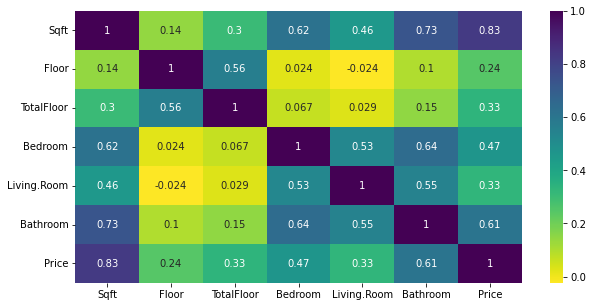

In [16]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot = True,cmap=plt.cm.get_cmap('viridis_r'))

C:\Users\Info\anaconda3\sushmitha\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sqft'>

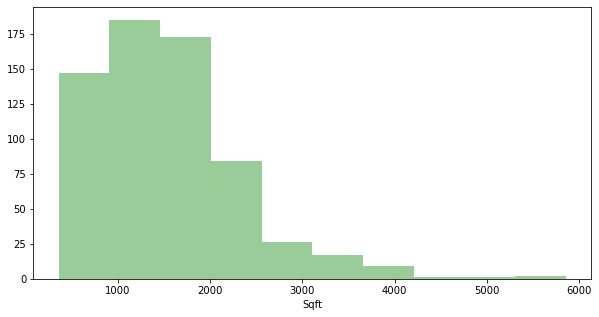

In [17]:
plt.figure(figsize=(10,5))
sns.distplot(df['Sqft'],kde = False, color = 'green', bins = 10)

<AxesSubplot:xlabel='Price', ylabel='Density'>

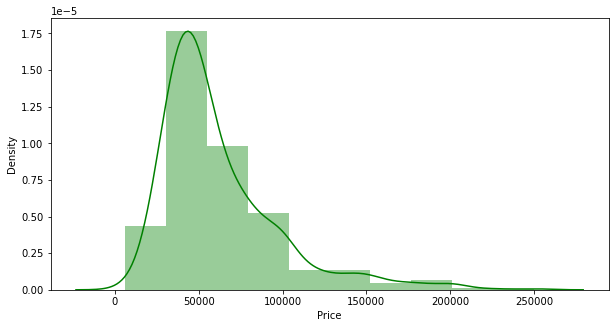

In [18]:
plt.figure(figsize=(10,5))
sns.distplot(df['Price'],kde = True, color = 'green', bins = 10)

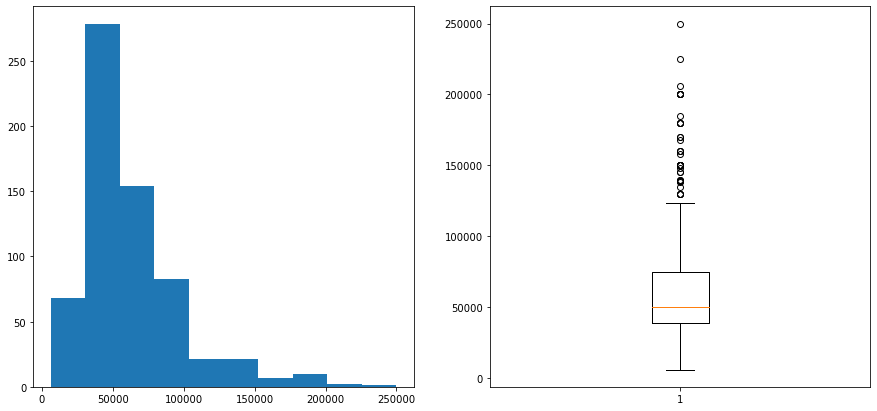

In [19]:
figs = plt.figure(figsize=(15,7))
ax1 = figs.add_subplot(121)
ax2 = figs.add_subplot(122)
x = df["Price"]
ax1.hist(x)
ax2.boxplot(x);

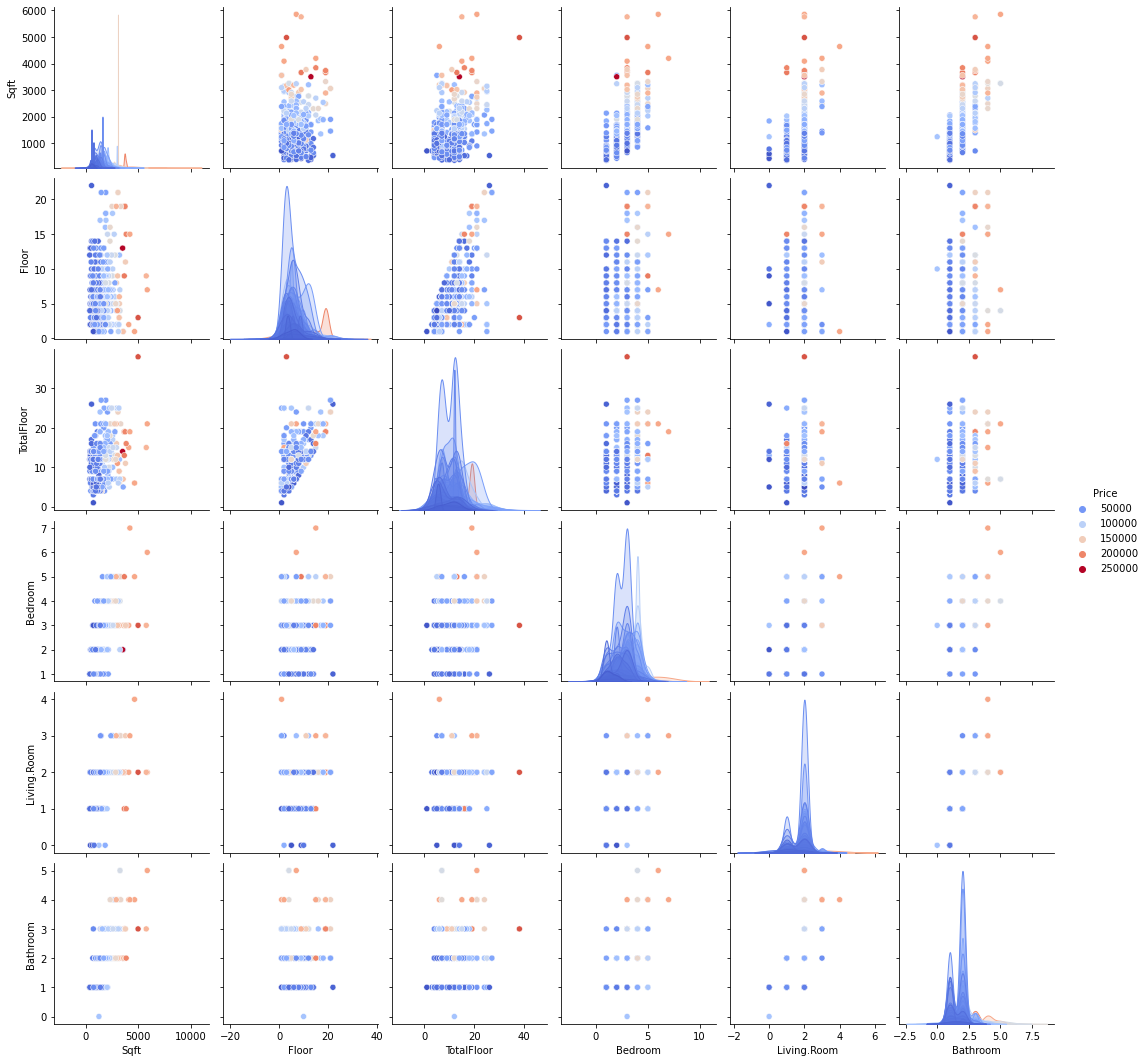

In [20]:
sns.pairplot(df, hue = 'Price', palette = 'coolwarm')

<AxesSubplot:xlabel='Sqft', ylabel='Price'>

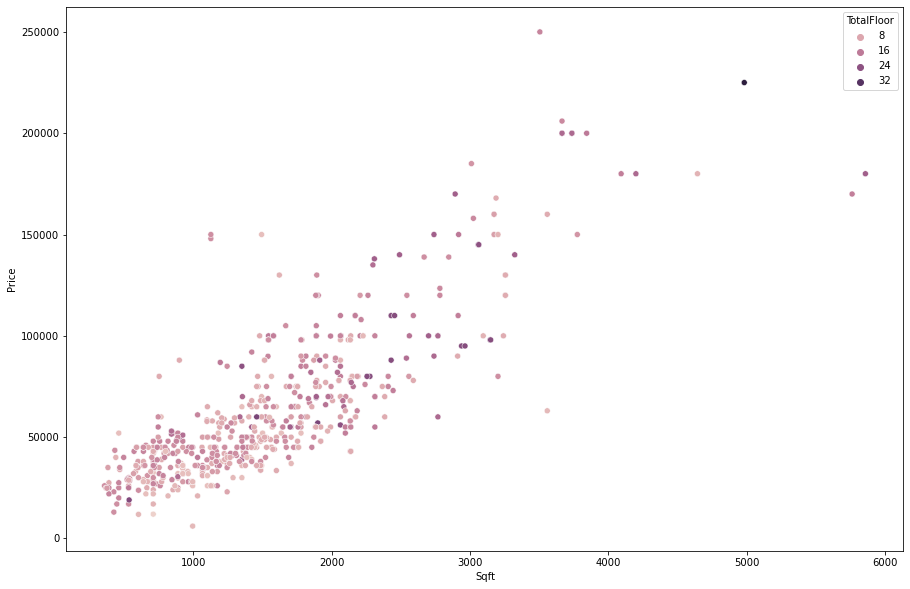

In [21]:
plt.figure(figsize = (15,10))
sns.scatterplot(data = df, x = df['Sqft'], y = df['Price'], hue = 'TotalFloor')

<AxesSubplot:xlabel='Bathroom', ylabel='Price'>

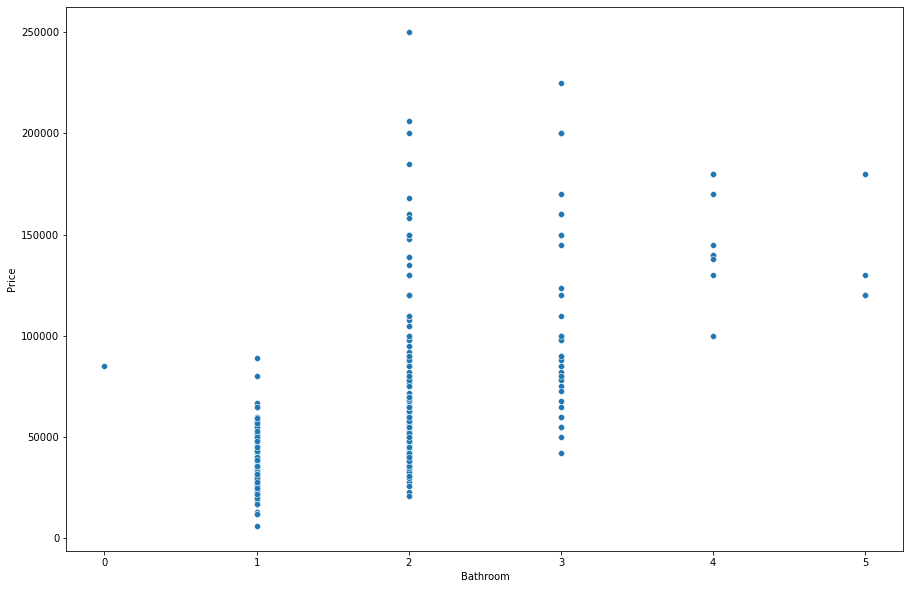

In [22]:
plt.figure(figsize = (15,10))
sns.scatterplot(data = df, x = df['Bathroom'], y =df['Price'])

In [23]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, normalize
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [24]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [25]:
pd.DataFrame(scaled_data).describe()

,0,1,2,3,4,5,6
count,6.450000e+02,6.450000e+02,6.450000e+02,6.450000e+02,6.450000e+02,6.450000e+02,6.450000e+02
mean,7.289604e-17,1.056971e-17,-6.024466e-18,-1.684269e-16,1.984631e-16,9.191614e-17,-8.451465e-17
std,1.000776e+00,1.000776e+00,1.000776e+00,1.000776e+00,1.000776e+00,1.000776e+00,1.000776e+00
min,-1.523619e+00,-1.272516e+00,-1.974190e+00,-1.819099e+00,-3.926263e+00,-2.651152e+00,-1.569526e+00
25%,-7.858412e-01,-7.572786e-01,-7.723470e-01,-8.289563e-01,4.026936e-01,-1.187117e+00,-6.455621e-01
50%,-1.362251e-01,-2.420416e-01,2.291886e-01,1.611860e-01,4.026936e-01,2.769182e-01,-3.366380e-01
75%,4.762700e-01,5.308140e-01,6.298029e-01,1.151328e+00,4.026936e-01,2.769182e-01,3.654621e-01
max,5.645358e+00,4.137473e+00,5.437174e+00,4.121755e+00,4.731650e+00,4.669023e+00,5.280163e+00


In [26]:
# Optimum number of clusters using elbow method -

kmeans = KMeans(n_clusters = 4, init = 'k-means++')
kmeans.fit(scaled_data)

KMeans(n_clusters=4)

In [27]:
kmeans.inertia_

2154.143162154438

In [28]:
# sse = []
# for k in range(1,20):
    
#     kmeans = KMeans(n_jobs = -1,n_clusters = k,init = 'k-means++')
#     kmeans.fit()
#     sse.append(kmeans.inertia_)
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 15)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(scaled_data)
    kmeanModel.fit(scaled_data)

    distortions.append(sum(np.min(cdist(scaled_data, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / scaled_data.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(scaled_data, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / scaled_data.shape[0]
    mapping2[k] = kmeanModel.inertia_   

C:\Users\Info\anaconda3\sushmitha\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Info\anaconda3\sushmitha\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


1 : 2.3615265828331347
2 : 1.9847844864092707
3 : 1.7681153470508448
4 : 1.6573745076540258
5 : 1.525129786747013
6 : 1.46148465950015
7 : 1.4128613634172298
8 : 1.3645422391445114
9 : 1.324175501404726
10 : 1.2914586738370837
11 : 1.250871445432488
12 : 1.2297154942328092
13 : 1.1980426970258593
14 : 1.171373101825308


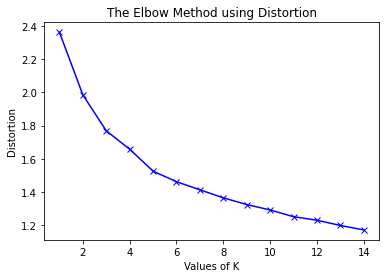

In [29]:
for key,val in mapping1.items():
    print(str(key)+' : '+str(val))

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

1 : 4514.999999999999
2 : 3205.723708410711
3 : 2502.440819753054
4 : 2154.4321586968217
5 : 1881.5779811302095
6 : 1725.2385373055083
7 : 1632.8298678862197
8 : 1516.110464379015
9 : 1433.1554848195046
10 : 1365.951874084809
11 : 1283.0424468656643
12 : 1219.6151690122663
13 : 1172.3564340529044
14 : 1128.1945332357986


Text(0.5, 1.0, 'The Elbow Method using Inertia')

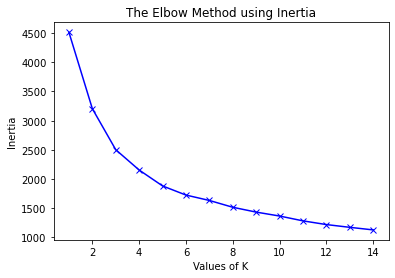

In [30]:
for key,val in mapping2.items():
    print(str(key)+' : '+str(val))
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')

In [31]:
# From the two graphs it can be concluded that 5 is the optimum number of cluster for our dataset.

In [32]:
kmeans = KMeans( n_clusters = 6, init = 'k-means++')
kmeans.fit(scaled_data)
pred = kmeans.predict(scaled_data)

In [33]:
frame = pd.DataFrame(scaled_data)
frame['cluster'] = pred
frame['cluster'].value_counts()

5    222
2    115
0    114
1     93
3     73
4     28
Name: cluster, dtype: int64

In [34]:
kmeans = KMeans( n_clusters = 8, init = 'k-means++')
kmeans.fit(scaled_data)
pred = kmeans.predict(scaled_data)

In [35]:
frame = pd.DataFrame(scaled_data)
frame['cluster'] = pred
frame['cluster'].value_counts()

6    123
4    114
3    111
5    107
1     82
7     64
2     30
0     14
Name: cluster, dtype: int64